In [1]:
#The name of this project is 'Cryptara' and the objective of this script is to build a Robo-advisor
name = input("Welcome Crypto Investor, what is your name?")

Welcome Crypto Investor, what is your name? jake


In [2]:
if name != "" or name == None:
    # If so, write a print with a string of "Hello" concatenated with the variable `name`.
    print(f"Hello {name}, my name is Cryptara. I make your savings go to good use in the Crypto market..")
    print(f"Tell me, do you have a csv file to upload or would you rather manually input your crypto tickers below?")
    print('')
    data_source=input("type: import or input")
    investment_value=input("how much would you like to invest?")
    print('')
    print(f'Once I have your list, This process starts automatically..')
    print(f'I use data from the TradingView API and filter your list, then I apply a built-in technical analysis function to determine which cryptos are good picks at this point in time')
    print(f"Then, I run hundreds of simulations to determine optimal weights for each crypto selection")
    print(f"From there, I will scan multiple exchanges to determine where you could get the most volume for the dollar at that particular time '(based on cross-exchange rates)'")
    print(f"Lastly, I will present to you an interactive Dashboard based on future projections..")

Hello jake, my name is Cryptara. I make your savings go to good use in the Crypto market..
Tell me, do you have a csv file to upload or would you rather manually input your crypto tickers below?



type: import or input df
how much would you like to invest? df



Once I have your list, This process starts automatically..
I use data from the TradingView API and filter your list, then I apply a built-in technical analysis function to determine which cryptos are good picks at this point in time
Then, I run hundreds of simulations to determine optimal weights for each crypto selection
From there, I will scan multiple exchanges to determine where you could get the most volume for the dollar at that particular time '(based on cross-exchange rates)'
Lastly, I will present to you an interactive Dashboard based on future projections..


In [3]:
if data_source == 'input':
    ticker_1=input("Tell me the first ticker")
    ticker_2=input("Tell me the first ticker")
    ticker_3=input("Tell me the first ticker")
    ticker_4=input("Tell me the first ticker")
#OPEN define input option, user can either import csv file or input their tickers directly.
#Let user insert their tickers for the week:
#print(f"Tell me {name}, what are your favoriate cryptos this week?")
#crypto_one = (input("enter the ticker of your first choice:"))
#crypto_two = input("enter the ticker of your second choice:")
print(f'Thanks for using our csv file import option! Let me look through your list and see if I can validate the data..')
#OR USE LIST IMPORT
#ticker_data = Path("../crypto_thirtysix.csv")
#ticker= pd.read_csv(ticker_data, header=None)

Thanks for using our csv file import option! Let me look through your list and see if I can validate the data..


In [4]:
#Import libraries and dependencies
from dotenv import load_dotenv
from itertools import product
import datetime
import os
import logging
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [5]:
#Create TradingView variable and activate env variables
from tvDatafeed import TvDatafeed,Interval
load_dotenv()
tradev_id = os.getenv("username")
tradev_secret_key = os.getenv("password")

In [6]:
#Log into TradingView
logging.basicConfig(level=logging.DEBUG)
tv = TvDatafeed(tradev_id, tradev_secret_key, chromedriver_path=None)

DEBUG:tvDatafeed.main:auth loaded


In [7]:
from pathlib import Path
ticker_data = Path("data_files/crypto_tickers.csv")
ticker= pd.read_csv(ticker_data, header=None)
ticker_df = pd.DataFrame(ticker)
my_crypto_list = ticker_df[0].tolist()
screener="CRYPTO"
exchange="BINANCE"
df_daily = pd.DataFrame()
print(f"Nice work! No issues have been identified, let me look into these and get back to you shortly...")

Nice work! No issues have been identified, let me look into these and get back to you shortly...


In [8]:
#Get historical pricing information for total population
for ticker in my_crypto_list:
    data = tv.get_hist(
        symbol=ticker,
        exchange=exchange,
        interval=Interval.in_daily,n_bars=500)
    df_daily = df_daily.append(data)
print(f'finished extracting historical prices..')

DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:1INCHUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:DOGEUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:LTCUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:SUSHIUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:MANAUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:MIRUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:LRCUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:LPTUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:AAVEUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:ANKRUSD...
DEBUG:root:c

finished extracting historical prices..


In [9]:
#Grab indicator recommendations from Trading View API
from tradingview_ta import TA_Handler, Interval, Exchange
staging_df = pd.DataFrame()
ticker_df_daily = pd.DataFrame()
for ticker in my_crypto_list:
    try:
        data = (TA_Handler(symbol=ticker,screener=screener,
                           exchange=exchange,interval=Interval.INTERVAL_1_DAY ).get_analysis().summary)
        symbol = ticker
        staging_df = list(data.values())
        final_df = (pd.DataFrame((data), index={ticker}))
        ticker_df_daily = ticker_df_daily.append(final_df)
    except:
        pass
print(f'finished extracting analyst recommendations..')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionp

finished extracting analyst recommendations..


In [10]:
#Filter imported list by analyst recommendations
initial_drop = ticker_df_daily.loc[ticker_df_daily['RECOMMENDATION']=='SELL']
initial_pass_prime = ticker_df_daily.loc[ticker_df_daily['RECOMMENDATION']=='BUY']
initial_pass_subprime = ticker_df_daily.loc[ticker_df_daily['RECOMMENDATION']=='NEUTRAL']
#initial_drop = initial_indicator['RECOMMENDATION'].str.contains('SELL')
buy_count = initial_pass_prime['RECOMMENDATION'].count() + initial_pass_subprime['RECOMMENDATION'].count()
sell_count = initial_drop['RECOMMENDATION'].count()
print('Here are the initial findings:')
print('')
print(f'It is not a good time to invest in {sell_count} of the cryptos from your list')
print(f'These {sell_count} cryptos are not in a buying position')
print(initial_drop['RECOMMENDATION'])
print(f'These {sell_count} cryptos have been dropped from consideration..')
print('')
print('')
print(f'Moving on, our initial inidicator data suggest {buy_count} cryptos from your list should be considered for further analysis:')
print('Here they are:')
print('Our Prime candidates that are in buy positions are:')
print(initial_pass_prime['RECOMMENDATION'])
print('')
print('And these are neutral for now, we can resverve for later if we need additional cryptos for analysis')
print(initial_pass_subprime['RECOMMENDATION'])

Here are the initial findings:

It is not a good time to invest in 21 of the cryptos from your list
These 21 cryptos are not in a buying position
1INCHUSD    SELL
LTCUSD      SELL
SUSHIUSD    SELL
MANAUSD     SELL
AAVEUSD     SELL
ANKRUSD     SELL
BALUSD      SELL
BATUSD      SELL
BCHUSD      SELL
BNTUSD      SELL
BTCUSD      SELL
COMPUSD     SELL
ENJUSD      SELL
ETHUSD      SELL
FILUSD      SELL
LINKUSD     SELL
MATICUSD    SELL
OXTUSD      SELL
SKLUSD      SELL
STORJUSD    SELL
ZECUSD      SELL
Name: RECOMMENDATION, dtype: object
These 21 cryptos have been dropped from consideration..


Moving on, our initial inidicator data suggest 4 cryptos from your list should be considered for further analysis:
Here they are:
Our Prime candidates that are in buy positions are:
CRVUSD    BUY
RENUSD    BUY
Name: RECOMMENDATION, dtype: object

And these are neutral for now, we can resverve for later if we need additional cryptos for analysis
LRCUSD    NEUTRAL
XTZUSD    NEUTRAL
Name: RECOMMENDATION

In [11]:
#Extract index values for the tickers that are prime and subprime and format data for further analysis. 
initial_pass_prime.reset_index(inplace=True)
initial_pass_prime = initial_pass_prime['index']
initial_pass_subprime.reset_index(inplace=True)
initial_pass_subprime = initial_pass_subprime['index']
staging_df = pd.DataFrame()
staging_df1 = pd.DataFrame()
prime_df = pd.DataFrame()
subprime_df = pd.DataFrame()
print(f'Nice work, {name}, you found {buy_count} cryptos that might be good investments this week!')
print(f'However, give me a minute while I dig into some insider techniques')

Nice work, jake, you found 4 cryptos that might be good investments this week!
However, give me a minute while I dig into some insider techniques


In [12]:
#Run a for loop through prime and subprime cryptos and pull in all oscilattor data for technical analysis
#Prime cryptos
for ticker in initial_pass_prime:
    try:
        data = (TA_Handler(symbol=ticker,screener=screener,
                           exchange=exchange,interval=Interval.INTERVAL_1_DAY ).get_analysis().indicators)
        symbol = ticker
        staging_df = list(data.values())
        final_df = (pd.DataFrame((data), index={ticker}))
        prime_df = prime_df.append(final_df)
    except:
        pass
    
#Sub-prime cryptos
for ticker in initial_pass_subprime:
    try:
        data = (TA_Handler(symbol=ticker,screener=screener,
                           exchange=exchange,interval=Interval.INTERVAL_1_DAY ).get_analysis().indicators)
        symbol = ticker
        staging_df1 = list(data.values())
        final_df = (pd.DataFrame((data), index={ticker}))
        subprime_df = subprime_df.append(final_df)
    except:
        pass
print('Extracted oscillator data for built-in technical analysis test')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None


Extracted oscillator data for built-in technical analysis test


In [13]:
#Extract oscillator information for all cryptos that meet the 'buy threshold'  
crypataras_picks = []
print(f'Determining which cryptos are well positioned from a technical analysis perspective.')
print(f'This test applies a threshold to the oscillator values to determine if any cryptos are either in an overbought or oversold position')
print(f'')
def strong_performers():
    for i, j in prime_df.iterrows():
        if j['RSI'] > 45 and j['RSI'] < 90:
            print(f'{i} has passed the rsi_test, moving to moving average covergence and divergence analysis..')
            if j['MACD.macd'] > 0 and j['MACD.macd'] < 40:
                print(f'{i} has passed our moving average covergence and divergence analysis, moving to stochator analysis..')
                if j['Stoch.K'] > 35 and j['Stoch.K'] < 85:
                    if j['Stoch.D'] > 40 and j['Stoch.D'] < 85:
                        if j['Stoch.RSI.K'] > 30 and j['Stoch.RSI.K'] < 80:
                            print(f'{i} has passed our multiple stochator analysis, testing the Awesome Oscillators..')
                            if j['AO'] > 0 and j['AO'] < 55:
                                crypataras_picks.append(i)
                                
    else:
        print(f'{i} has failed one of our oscillator performance test and is dropped from consideration..')

strong_performers()
initial_count = len(crypataras_picks)
print(f'')
print('Done with technical analysis test..')

Determining which cryptos are well positioned from a technical analysis perspective.
This test applies a threshold to the oscillator values to determine if any cryptos are either in an overbought or oversold position

CRVUSD has passed the rsi_test, moving to moving average covergence and divergence analysis..
CRVUSD has passed our moving average covergence and divergence analysis, moving to stochator analysis..
CRVUSD has passed our multiple stochator analysis, testing the Awesome Oscillators..
RENUSD has passed the rsi_test, moving to moving average covergence and divergence analysis..
RENUSD has passed our moving average covergence and divergence analysis, moving to stochator analysis..
RENUSD has passed our multiple stochator analysis, testing the Awesome Oscillators..
RENUSD has failed one of our oscillator performance test and is dropped from consideration..

Done with technical analysis test..


In [14]:
print(f'{initial_count} of the cryptos from your list are in an optimal buying position.')
print(f'{initial_count} of the cryptos from your list are in an optimal buying position.Here they are: {crypataras_picks}')
Dup = {}
#print(This program requires a minimum of five cryptos to run further analysis. Importing random ticker from subprime dataframe 
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_1 = subprime_df.sample().reset_index()
    ticker_random_1 = computer_selection_1.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_1])
    if string in crypataras_picks:
        string = Dup[string]
    else:
        crypataras_picks.append(string)
        Dup[string] = string = len(crypataras_picks)-1
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_2 = subprime_df.sample().reset_index()
    ticker_random_2 = computer_selection_2.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_2])
    if string in crypataras_picks:
        string = Dup[string]
    else:
        crypataras_picks.append(string)
        Dup[string] = string = len(crypataras_picks)-1
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_3 = subprime_df.sample().reset_index()
    ticker_random_3 = computer_selection_3.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_3])
    if string in crypataras_picks:
        string = Dup[string]
    else:
        crypataras_picks.append(string)
        Dup[string] = string = len(crypataras_picks)-1

2 of the cryptos from your list are in an optimal buying position.
2 of the cryptos from your list are in an optimal buying position.Here they are: ['CRVUSD', 'RENUSD']
This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..
This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..
This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..


In [15]:
from tvDatafeed import TvDatafeed,Interval
load_dotenv()
tradev_id = os.getenv("username")
tradev_secret_key = os.getenv("password")
logging.basicConfig(level=logging.DEBUG)
tv = TvDatafeed(tradev_id, tradev_secret_key, chromedriver_path=None)

DEBUG:tvDatafeed.main:auth loaded


In [16]:
final_crypto_df = pd.DataFrame()
bars= 100
for all_picks in crypataras_picks:
    picks_df = tv.get_hist(symbol=all_picks,
                       exchange=exchange,
                       interval=Interval.in_daily,
                       n_bars=bars)
    final_crypto_df = final_crypto_df.append(picks_df)
final_crypto_df.head(5)

DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:CRVUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:RENUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:XTZUSD...


,symbol,open,high,low,close,volume
datetime,,,,,,
2021-06-12 19:00:00,BINANCE:CRVUSD,2.086346,2.389392,1.961086,2.203828,1.252872e+06
2021-06-13 19:00:00,BINANCE:CRVUSD,2.200719,2.337769,2.111922,2.279270,1.682787e+06
2021-06-14 19:00:00,BINANCE:CRVUSD,2.273578,2.415462,2.176484,2.238134,1.946649e+06
2021-06-15 19:00:00,BINANCE:CRVUSD,2.237209,2.257311,2.038075,2.075834,1.171889e+06
2021-06-16 19:00:00,BINANCE:CRVUSD,2.075246,2.198807,1.993517,2.095853,1.073165e+06


In [17]:
#Format dataframe.
#Step 1: extract exchange and ticker from 'symbol' column into separate columns.
final_df_cleaner = final_crypto_df
final_df_cleaner[['exchange', 'ticker']] = final_df_cleaner['symbol'].str.split(':',expand=True)
#Step 2: Extract ticker and close values, reset index
final_df_cleaner = final_df_cleaner[['ticker','close']]
final_df_cleaner = final_df_cleaner[['ticker','close']].reset_index()
#Step3: Pivot data to make ticker values the column headers
final_df_cleaner = final_df_cleaner.pivot(index='datetime',
           columns='ticker',
           values='close')
#Step4: calculate return data
print('Extracted historical returns into dataframe..')
crypto_pick_returns = final_df_cleaner.pct_change().dropna()
crypto_pick_returns.head(5)

Extracted historical returns into dataframe..


ticker,CRVUSD,RENUSD,XTZUSD
datetime,,,
2021-06-13 19:00:00,0.034232,0.058208,0.011732
2021-06-14 19:00:00,-0.018048,0.026889,-0.024462
2021-06-15 19:00:00,-0.072516,-0.092482,-0.046616
2021-06-16 19:00:00,0.009644,0.027558,0.080887
2021-06-17 19:00:00,-0.080973,-0.082655,-0.080355


In [18]:
#Step5: Calculate Cumulative Returns
print('Calculated cumulative returns..')
cumulative_daily_returns = (1 + crypto_pick_returns).cumprod() -1
cumulative_daily_returns.head(3)

Calculated cumulative returns..


ticker,CRVUSD,RENUSD,XTZUSD
datetime,,,
2021-06-13 19:00:00,0.034232,0.058208,0.011732
2021-06-14 19:00:00,0.015567,0.086662,-0.013017
2021-06-15 19:00:00,-0.058078,-0.013834,-0.059026


In [19]:
#Step5: Calculate Cumulative Returns
print('Activating Cryptara Smartfolio')
print('Logging returns to normalize dataset..')
log_returns= np.log(cumulative_daily_returns)
log_returns.tail()

Activating Cryptara Smartfolio
Logging returns to normalize dataset..


ticker,CRVUSD,RENUSD,XTZUSD
datetime,,,
2021-09-15 19:00:00,-0.897680,0.250223,0.089928
2021-09-16 19:00:00,-1.307248,0.157271,-0.167173
2021-09-17 19:00:00,-1.171450,0.214723,-0.070304
2021-09-18 19:00:00,-0.964579,0.041567,-0.031281
2021-09-19 19:00:00,-1.427126,-0.095360,-0.279012


In [20]:
#Calculate volatility and 
print(f'Running multiple scenaries to determine appropriate weights for selected cryptos')
#Initialize variables for 
num_of_portfolios= 5000
weight= np.zeros((num_of_portfolios,len(crypataras_picks)))
expected_return=  np.zeros(num_of_portfolios)
expected_volatility= np.zeros(num_of_portfolios)
sharpe_ratio= np.zeros(num_of_portfolios)
expected_return
mean_log_ret= log_returns.mean()
sigma = log_returns.cov()

for i in range (num_of_portfolios):
    # generate random weight vectos 
    w= np.array(np.random.random(len(crypataras_picks)))
        #sum of weights equal to 1 
    w= w/ np.sum(w)
    weight[i,:]= w
    
    # expected log return 
    expected_return[i]= np.sum(mean_log_ret*w) 
    
    #expected volatility 
    expected_volatility[i]= np.sqrt(np.dot(w.T,np.dot(sigma,w)))
    
    # sharpe ratio
    sharpe_ratio[i] =  expected_return[i]/expected_volatility[i]

Running multiple scenaries to determine appropriate weights for selected cryptos


In [21]:
# Weighted portfolio that sharpe ratio
max_index = sharpe_ratio.argmax()
weight[max_index,:]

array([9.15483626e-04, 9.70279504e-01, 2.88050119e-02])

In [22]:
# Portfolio weights are exported to a csv that can be used for monteclaro simulation
portfolio_weights = np.array([weight[max_index,:]])
smartfolio_weights = pd.DataFrame(portfolio_weights)
smartfolio_weights.to_csv('smartfolio_weights.csv')

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000200AC15BDC0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000200AC15BDC0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni

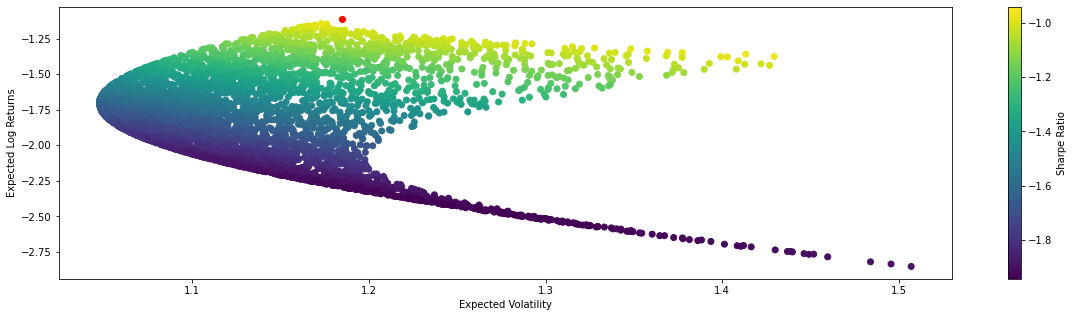

here are the smartfolio weights:          0        1         2
0  0.000915  0.97028  0.028805


In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(expected_volatility,expected_return,c=sharpe_ratio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Log Returns')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(expected_volatility[max_index], expected_return[max_index], c='red')
plt.show()
print(f'here are the smartfolio weights:{smartfolio_weights}')

In [24]:
#END OF DRAFT. INCLUDE AARON SIMULATION DATA

In [25]:
import itertools
from itertools import product
from MCForecastTools import MCSimulation

In [26]:
crypataras_picks

['CRVUSD', 'RENUSD', 'XTZUSD']

In [27]:
crypataras_picks

['CRVUSD', 'RENUSD', 'XTZUSD']

In [28]:
Dup_1 = {}
Dup_2 = {}
mcsims_data = []
for final_cryptos in crypataras_picks:
    mcsims = tv.get_hist(symbol=final_cryptos,
                       exchange=exchange,
                       interval=Interval.in_daily,
                       n_bars=bars)
    if mcsims in mcsims_data:
        mcsims = Dup_1[mcsims]
    else:
        mcsims_data.append(mcsims)
        Dup_1[mcsims] = mcsims = len(mcsims)-1
#mcsims_data_df    mcsims_data = mcsims_data.append(picks_df)

DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:CRVUSD...


TypeError: unhashable type: 'DataFrame'

In [ ]:
mcsims_data_df = pd.DataFrame(mcsims_data)
mcsims_data_df

In [ ]:
#mc_sims_returns 
#Format dataframe.
#Step 1: extract exchange and ticker from 'symbol' column into separate columns.
mc_sims_cleaner = mcsims_data_df
mc_sims_cleaner[['exchange', 'ticker']] = mc_sims_cleaner['symbol'].str.split(':',expand=True)
#Step 2: Extract ticker and close values, reset index
mc_sims_cleaner = mc_sims_cleaner[['ticker','close']]
mc_sims_cleaner = mc_sims_cleaner[['ticker','close']].reset_index()
#Step3: Pivot data to make ticker values the column headers
mc_sims_cleaner = mc_sims_cleaner.pivot(index='datetime',
           columns='ticker',
           values='close')
#Step4: calculate return data
#print('Reformatted columns for McSims Simulation')
mc_sims_returns = mc_sims_cleaner.pct_change().dropna()
mc_sims_returns.head(5)

crypataras_picks
crypto1_df = final_crypto_df.loc[final_crypto_df.symbol=='BINANCE:AVAXUSD']
crypto2_df = final_crypto_df.loc[final_crypto_df.symbol=='BINANCE:CRVUSD']
crypto3_df = final_crypto_df.loc[final_crypto_df.symbol=='BINANCE:BTCUSD']
crypto4_df = final_crypto_df.loc[final_crypto_df.symbol=='BINANCE:ETHUSD']
crypto5_df = final_crypto_df.loc[final_crypto_df.symbol=='BINANCE:ETHUSD']
raw_data = pd.concat([crypto1_df, crypto2_df, crypto3_df, crypto4_df,crypto5_df], axis='columns', join='inner')

mdex = itertools.product(my_crypto_portfolio, avax_df.columns)
columns = []
for x in mdex:
 columns.append(x)
raw_data.columns = pd.MultiIndex.from_tuples(columns)

In [ ]:
final_crypto_df

In [1]:
#inserting OP's notebook cells here:
#remind myself to plot sharpe ratio in scatter plotly from Alex's portion

# visualization - switch into pyviz env to view plots 

In [ ]:
#import things for visualizations and mc_tools
import panel as pn
pn.extension('plotly')
from panel.interact import interact
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from panel import widgets


import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

#tvdatafeed imports
from tvDatafeed import TvDatafeed, Interval
import datetime as dt
import os
import logging
from dotenv import load_dotenv
import pandas as pd

In [ ]:
#read in the mcforecast tools simulated dataframe
#(aarons MCsim dataframe of returns)
#this data should be a simulated number of days and returns(%)there should be no column names, just numbers 1+ for x & y axis
mcs_path = Path("mc_df.csv")
mc_df = pd.read_csv(mcs_path, index_col=[0])
mc_df.index.name="Days"
#make sure this is the right data
mc_df.head(30)

In [ ]:
#plot the simulated 100 predicted returns from montecarlo
fig = px.line(mc_df)
fig.update_layout(
    xaxis_title="Predicted Time Period(Days)",
    yaxis_title="Daily Return",
    showlegend=False,
    title='Simulation of Returns on Portfolio Investment')
fig.show()

In [ ]:
#read in returns stats from aarons portion, this should have 4 columns - 'min' 'max' 'mean' 'median'
mc_path = Path("mc_stats.csv")
df_simulated_returns = pd.read_csv(mc_path, index_col=[0])
df_simulated_returns.index.name="Days"
df_simulated_returns


In [ ]:
#plot simulated returns (this is in percent returns)

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig.update_layout(
    height=500,
    width=1200,
    xaxis_title="Number of Days(in Simulation)",
    yaxis_title="Daily Returns",
    legend_title="Stats",
    title="Statistical Analysis for Simulation of Return on Investment")
fig.show()




In [ ]:
# Set initial investment
initial_investment = 11999

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

In [ ]:
#Plot simulated investment portfolio returns with initial investment number (values are in USD)
fig = go.Figure()
fig.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig.update_layout(
    height=500,
    width=1200,
    xaxis_title="Time Period(Days)",
    yaxis_title="Returns(USD)",
    legend_title="Stats",
    title="$11,999 Initial Investment - Predicted Earnings")
fig.show()


print("You've chosen to invest $11,900 in a diverse cryptocurrency portfolio!")
print("This simulation can help you visualize what your portfolio may look like in the days following your initial investment.")
print("Let's take a look at some other coins that are popularly traded right now.")

In [ ]:
# -TRADING VIEW DATAFRAME LOOP CODE GOES HERE
#-----------------------
# pull data straight from tradingview api(if possible),
# or run this cell in trading view environment to get dataframes in same file as this notebook so it can pull it later.

# define tickers list
tickers=['COMPUSD','SUSHIUSD','LTCUSD','ETCUSD','DOGEUSD','STORJUSD','ADAUSD','BTCUSD','ETHUSD','SOLUSD','UNIUSD']

#set variables
my_crypto_portfolio = tickers
df_daily = pd.DataFrame()
exchange = 'COINBASE',

#create for loop to append each ticker into dataframe
for ticker in my_crypto_portfolio:
    data = tv.get_hist(
        symbol=ticker,
        exchange=exchange,
        interval=Interval.in_daily,n_bars=1000)
    df_daily = df_daily.append(data)
    
#adjust index from datetime to date to remove timestamp
df_daily.index = pd.to_datetime(df_daily.index, errors='coerce').date

#divide volume column by 1,000,000 to remove scientific notation in volume column
#ONLY RUN THIS ONCE - has compounding affect on volume column
df_daily['volume'] = (df_daily['volume'].astype(float)/1000).round(4).astype(float)
df_daily.tail(10)




In [ ]:
#write out OG df so you can access it once you switch environments into Pyviz
df_daily.to_csv('coinbase_tickers/daily_ohlc.csv', index=True)



In [ ]:
#DO NOT RUN THIS CELL IF YOU CAN RUN PYVIZ & TV SIMULTANEOUSLY
#read in COINBASE ohlc dataframe
daily_path = Path("coinbase_tickers/daily_ohlc.csv")
df_daily = pd.read_csv(daily_path, index_col=[0])


In [ ]:
#renames index 'date' so you can call it with plotly
df_daily.index.name = "Date"


# Set indv. ticker data as new dataframe via .loc Symbol to run for-loop when plotting
comp_df = df_daily.loc[df_daily.symbol=='COINBASE:COMPUSD']
sushi_df = df_daily.loc[df_daily.symbol=='COINBASE:SUSHIUSD']
ltc_df = df_daily.loc[df_daily.symbol=='COINBASE:LTCUSD']
etc_df = df_daily.loc[df_daily.symbol=='COINBASE:ETCUSD']
doge_df = df_daily.loc[df_daily.symbol=='COINBASE:DOGEUSD']
storj_df = df_daily.loc[df_daily.symbol=='COINBASE:STORJUSD']
ada_df = df_daily.loc[df_daily.symbol=='COINBASE:ADAUSD']
btc_df = df_daily.loc[df_daily.symbol=='COINBASE:BTCUSD']
eth_df = df_daily.loc[df_daily.symbol=='COINBASE:ETHUSD']
sol_df = df_daily.loc[df_daily.symbol=='COINBASE:SOLUSD']
uni_df = df_daily.loc[df_daily.symbol=='COINBASE:UNIUSD']

#reset COINBASE ticker index for last 60 days to prep for plotting candlestick & RSI
comp_df=comp_df.tail(60).reset_index()
sushi_df=sushi_df.tail(60).reset_index()
ltc_df=ltc_df.tail(60).reset_index()
etc_df=etc_df.tail(60).reset_index()
doge_df=doge_df.tail(60).reset_index()
storj_df=storj_df.tail(60).reset_index()
ada_df=ada_df.tail(60).reset_index()
btc_df=btc_df.tail(60).reset_index()
eth_df=eth_df.tail(60).reset_index()
sol_df=sol_df.tail(60).reset_index()
uni_df=uni_df.tail(60).reset_index()

In [ ]:
# Add dropdown if possible in dash/panel?

#plot simple candlestick charts
df_list = [comp_df, sushi_df, ltc_df, etc_df, doge_df, storj_df, ada_df, btc_df, eth_df, sol_df, uni_df]

for df in df_list:
    fig = go.Figure(
    data=[
        go.Candlestick(x=df['Date'],
                       open=df['open'],
                       high=df['high'],
                       low=df['low'],
                       close=df['close'],
                       increasing_line_color= 'olive', decreasing_line_color= 'darkred')
        
    ])
    fig.update(layout_xaxis_rangeslider_visible=False)
    fig.update_layout(
        height=500,
        width=1200,
        title=f'{df.symbol[0]} Daily Price',
        xaxis_title='Date',
        yaxis_title='Daily Price')
    fig.show()


In [ ]:
#for-loop plots other cryptocurrencies you may be interested in [can automate this if you can run TV and pyviz in same env]

print("When current price falls below the 'lower-bb' we can expect prices to begin to rise - this indicates a good BUY opportunity.") 
print("When current price raises above the 'upper-bb' we can expect prices to begin to fall soon - this presents an opportunity to SELL.")

# calculate sma and std for upper and lower bb for each df in df_list
df_list = [comp_df, sushi_df, ltc_df, etc_df, doge_df, storj_df, ada_df, btc_df, eth_df, sol_df, uni_df]
WINDOW=30

for df in df_list:
    df['sma'] = df['close'].rolling(WINDOW).mean()
    df['std'] = df['close'].rolling(WINDOW).std(ddof = 0)
    #plot within the loop(indent)
    # Create subplots with 2 rows; top for candlestick price, and bottom for bar volume
    fig = make_subplots(rows = 2, cols = 1, shared_xaxes = True, subplot_titles = (f'{df.symbol[0]} Relative Strength Index', 'Volume(MM)'), vertical_spacing = 0.1, row_width = [.5, 1.4])

# Candlestick Plot
    fig.add_trace(go.Candlestick(x = df['Date'],
                                 open = df['open'],
                                 high = df['high'],
                                 low = df['low'],
                                 close = df['close'], showlegend=False,
                                 increasing_line_color= 'olive', decreasing_line_color= 'darkred',
                                 name = 'candlestick'),
                  row = 1, col = 1)

# Moving Average
    fig.add_trace(go.Scatter(x = df['Date'],
                             y = df['sma'],
                             line_color = 'black',
                             name = 'sma'),
                  row = 1, col = 1)
    
# Upper Bound
    fig.add_trace(go.Scatter(x = df['Date'],
                             y = df['sma'] + (df['std'] * 2),
                             line_color = 'tan',
                             line = {'dash': 'dash'},
                             name = 'upper band',
                             opacity = 0.5),
                  row = 1, col = 1) 
# Lower Bound fill in between with parameter 'fill': 'tonexty'
    fig.add_trace(go.Scatter(x = df['Date'],
                             y = df['sma'] - (df['std'] * 2),
                             line_color = 'tan',
                             line = {'dash': 'dash'},
                             fill = 'tonexty',
                             name = 'lower band',
                             opacity = 0.5),
                  row = 1, col = 1)

# Labels & Titles
    fig.update_layout(
        height=500,
        width=1200,
        xaxis_title=None,
        yaxis_title="Price",
        legend_title="Indicators",
        )
# ----------------
# Volume Plot
    fig.add_trace(go.Bar(x = df['Date'], y = df['volume'], showlegend=False), 
              row = 2, col = 1)
# Remove range slider; (short time frame)
    fig.update(layout_xaxis_rangeslider_visible=False)
    
    fig.show();
    
   


In [ ]:
#add panel extension/dashboard (get this done by end of class monday)
#code freeze Tuesday Morning